IMPORTAZIONE LIBRERIE

In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [71]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


PATH PER ANALISI SUL VOLO M1

In [72]:
path_cartella_NoFaultM1 = r"\M1\NO_FAULT1"

path_NoFaultM1 = path_file + path_cartella_NoFaultM1

print(path_NoFaultM1)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\NO_FAULT1


In [73]:
att = pd.read_csv(path_NoFaultM1+"\ATT.csv")
att = att.drop(['ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(att)

        LineNo      TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0        188.0  15037000.0      0.0 -0.08       0.0  -0.60   17.24  11.69
1        291.0  15071000.0      0.0 -0.08       0.0  -0.60   23.31  11.71
2        633.0  15133000.0      0.0 -0.07       0.0  -0.60   31.41  11.73
3        746.0  15149000.0      0.0 -0.07       0.0  -0.60   33.44  11.74
4        859.0  15165000.0      0.0 -0.07       0.0  -0.60   35.46  11.74
...        ...         ...      ...   ...       ...    ...     ...    ...
6729  301650.0  87103000.0      0.0  1.49       0.0   1.36    2.88   2.86
6730  301700.0  87113000.0      0.0  1.51       0.0   1.35    2.89   2.87
6731  301740.0  87124000.0      0.0  1.53       0.0   1.35    2.90   2.88
6732  301790.0  87137000.0      0.0  1.56       0.0   1.35    2.91   2.89
6733  301830.0  87147000.0      0.0  1.57       0.0   1.35    2.91   2.89

[6734 rows x 8 columns]


C:\Users\chiar\AppData\Local\Temp\ipykernel_14076\176955277.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(ys, labels = ['Pitch', 'DesPitch'])


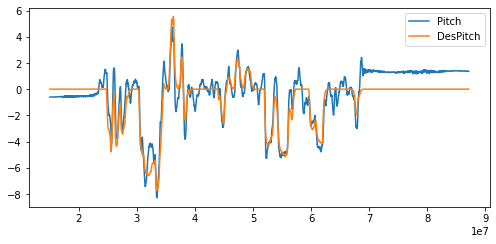

In [74]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
xs = att.TimeUS
ys = [att.Pitch, att.DesPitch]
for y in ys:
    plt.plot(xs, y)

plt.legend(ys, labels = ['Pitch', 'DesPitch'])

plt.show()


#plt.plot(att.TimeUS, [att.Pitch, att.DesPitch])

In [31]:
print(att.dtypes)

LineNo      float64
TimeUS      float64
DesRoll     float64
Roll        float64
DesPitch    float64
Pitch       float64
DesYaw      float64
Yaw         float64
dtype: object
